##### 케라스
- 상관관계, heatmap
- 정규화
- train/test 분리
- train[0] 예측
- acc score, f1 score, confusion matrix(train, test)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
from sklearn.datasets import load_breast_cancer

In [8]:
cancer = load_breast_cancer(as_frame=True)

In [9]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [11]:
df = cancer['frame']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [12]:
cancer_corr = df.corr()
cancer_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


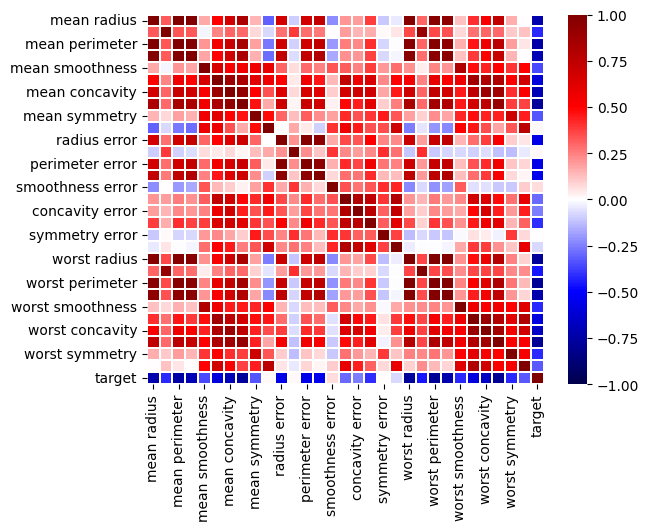

In [13]:
sns.heatmap(cancer_corr, annot=False,
            vmin=-1, vmax=1, linewidths=0.2,
            cmap='seismic')
plt.show()

In [14]:
x_data = df.iloc[:, :-1]
y_data = df.iloc[:, [-1]]
print(x_data.shape, y_data.shape)

(569, 30) (569, 1)


In [15]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, 
                                test_size=0.3, stratify=y_data)

In [ ]:

dense = Dense(units=1, input_dim=30, activation='sigmoid')
model = Sequential([dense])
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['acc'])
h = model.fit(x_train, y_train, epochs=1000)

In [21]:
## z = matmul( x, w) + b   hx = sigmoid( z )
model.predict( x_train[0].reshape(1,-1) ) # dense(x_train[0] )

1/1 [==============================] - 0s 69ms/step


array([[0.9999469]], dtype=float32)

### train 검정결과

In [26]:
predT = model.predict(x_train)
p =(predT>0.5)+0

13/13 [==============================] - 0s 858us/step


In [27]:
accuracy_score(y_train, p)

0.9899497487437185

In [28]:
c = confusion_matrix(y_train, p)
c

array([[145,   3],
       [  1, 249]], dtype=int64)

In [29]:
print(f1_score(y_train, p))

0.9920318725099602


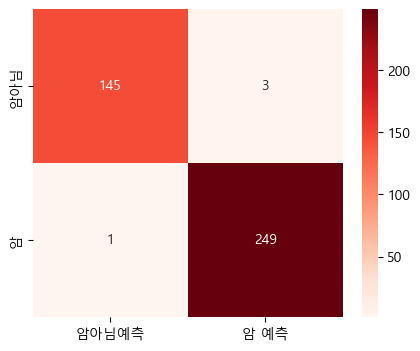

In [33]:
plt.figure(figsize=(5,4))
sns.heatmap(c, annot=True, fmt='d',
            xticklabels=['암아님예측', '암 예측'],
            yticklabels=['암아님', '암'],
            cmap='Reds')
plt.show()

### test검정

In [35]:
predTest = model.predict(x_test)
pt =(predTest>0.5)+0

6/6 [==============================] - 0s 1ms/step


In [36]:
accuracy_score(y_test, pt)

0.9707602339181286

In [37]:
f1_score( y_test, pt )

0.9767441860465117

In [38]:
cc = confusion_matrix(y_test, pt)
cc

array([[ 61,   3],
       [  2, 105]], dtype=int64)

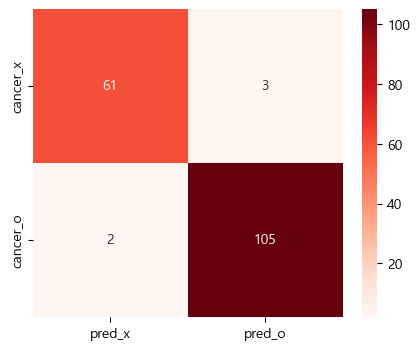

In [39]:
plt.figure(figsize=(5,4))
sns.heatmap(cc, annot=True, fmt='d',
            xticklabels=['pred_x', 'pred_o'],
            yticklabels=['cancer_x', 'cancer_o'],
            cmap='Reds')
plt.show()